In [1]:
#New Covid data state indiana
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/abhi/Downloads/vaccinations-by-zip-with-population.csv')

In [4]:
data

,zip_cd,single_dose_administered,all_doses_administered,fully_vaccinated,booster_dose_administered,eligible_population
0,46001,334,13875,5237,2687,9433
1,46011,588,27172,9907,5661,16392
2,46012,634,28860,10495,5988,18671
3,46013,737,26996,10145,5417,15946
4,46016,707,18318,7251,3051,16904
...,...,...,...,...,...,...
770,47992,42,2130,770,439,1327
771,47993,144,4396,1678,859,3502
772,47994,20,538,213,96,296
773,47995,54,1890,733,352,1516


In [5]:
total_eligible_population = data.sum()[5]
total_eligible_population
#we can see from above

6246787

In [6]:
#We need to preprocess the data as String is also included in the columns

In [7]:
data.count()

zip_cd                       775
single_dose_administered     775
all_doses_administered       775
fully_vaccinated             775
booster_dose_administered    775
eligible_population          775
dtype: int64

In [8]:
full_vaccinated=data.iloc[:,4]

In [9]:
data.shape[0]

775

In [10]:
data.dtypes

zip_cd                        int64
single_dose_administered     object
all_doses_administered       object
fully_vaccinated             object
booster_dose_administered    object
eligible_population           int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   zip_cd                     775 non-null    int64 
 1   single_dose_administered   775 non-null    object
 2   all_doses_administered     775 non-null    object
 3   fully_vaccinated           775 non-null    object
 4   booster_dose_administered  775 non-null    object
 5   eligible_population        775 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 36.5+ KB


In [12]:
data.describe()

,zip_cd,eligible_population
count,775.000000,775.000000
mean,47003.141935,8060.370323
std,602.406089,10979.671412
min,46001.000000,0.000000
25%,46501.500000,976.500000
50%,47016.000000,2989.000000
75%,47506.500000,10721.000000
max,47997.000000,74443.000000


In [13]:
# from pandas_profiling import ProfileReport
# report =ProfileReport(data, title="COVID Profiling Report")
# report

In [14]:
data.mean()

/var/folders/p8/nn92k_193cgffg7msmx3v4km0000gn/T/ipykernel_51220/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


zip_cd                 47003.141935
eligible_population     8060.370323
dtype: float64

<b> For data preprocessing, we will iterate over all the columns and select those values which are numeric and take the sum for values with the count and insert into a dictionary correspionding to each column

In [15]:
avg_val_per_col={}
sumr=0
c_col=0
c_col_str=0
for j in range(data.shape[1]):
    sumr=0
    c_col=0
    c_col_str=0
    for i in range(data.shape[0]):
        if((data.iloc[i,j])!='Suppressed'):
            sumr=sumr+int(data.iloc[i,j])
            c_col=c_col+1
        else:
            c_col_str=c_col_str+1
    print("Column =",j,"col str count =",c_col_str,"col count =",c_col,"Sum of all vals ",sumr)
    avg_val_per_col[j] = sumr/total_eligible_population

Column = 0 col str count = 0 col count = 775 Sum of all vals  36427435
Column = 1 col str count = 47 col count = 728 Sum of all vals  271847
Column = 2 col str count = 26 col count = 749 Sum of all vals  9837976
Column = 3 col str count = 26 col count = 749 Sum of all vals  3681968
Column = 4 col str count = 26 col count = 749 Sum of all vals  1943242
Column = 5 col str count = 0 col count = 775 Sum of all vals  6246787


In [16]:
avg_val_per_col

{0: 5.831387399634404,
 1: 0.043517891677753696,
 2: 1.5748857772803844,
 3: 0.5894178879478362,
 4: 0.3110786393068949,
 5: 1.0}

In [17]:
data

,zip_cd,single_dose_administered,all_doses_administered,fully_vaccinated,booster_dose_administered,eligible_population
0,46001,334,13875,5237,2687,9433
1,46011,588,27172,9907,5661,16392
2,46012,634,28860,10495,5988,18671
3,46013,737,26996,10145,5417,15946
4,46016,707,18318,7251,3051,16904
...,...,...,...,...,...,...
770,47992,42,2130,770,439,1327
771,47993,144,4396,1678,859,3502
772,47994,20,538,213,96,296
773,47995,54,1890,733,352,1516


<b>Converting data with converting each value into numeric or if Supressed multiply by column_avg

In [18]:
for j in range(data.shape[1]):
    for i in range(data.shape[0]):
        if((data.iloc[i,j])!='Suppressed'):
            data.iloc[i,j]=int(data.iloc[i,j])
        else:
            data.iloc[i,j] = int(data.iloc[i,5]*avg_val_per_col[j])

In [19]:
data

,zip_cd,single_dose_administered,all_doses_administered,fully_vaccinated,booster_dose_administered,eligible_population
0,46001,334,13875,5237,2687,9433
1,46011,588,27172,9907,5661,16392
2,46012,634,28860,10495,5988,18671
3,46013,737,26996,10145,5417,15946
4,46016,707,18318,7251,3051,16904
...,...,...,...,...,...,...
770,47992,42,2130,770,439,1327
771,47993,144,4396,1678,859,3502
772,47994,20,538,213,96,296
773,47995,54,1890,733,352,1516


<b> Data Preprocessed Now, we can use for analysis


In [20]:
# processed_report = ProfileReport(data,title='Processed Covid Data Report')
# processed_report

<b> Plot Distributions for all features

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   zip_cd                     775 non-null    int64 
 1   single_dose_administered   775 non-null    object
 2   all_doses_administered     775 non-null    object
 3   fully_vaccinated           775 non-null    object
 4   booster_dose_administered  775 non-null    object
 5   eligible_population        775 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 36.5+ KB


In [22]:
#convert all the columns to int64
data=data.astype(int)

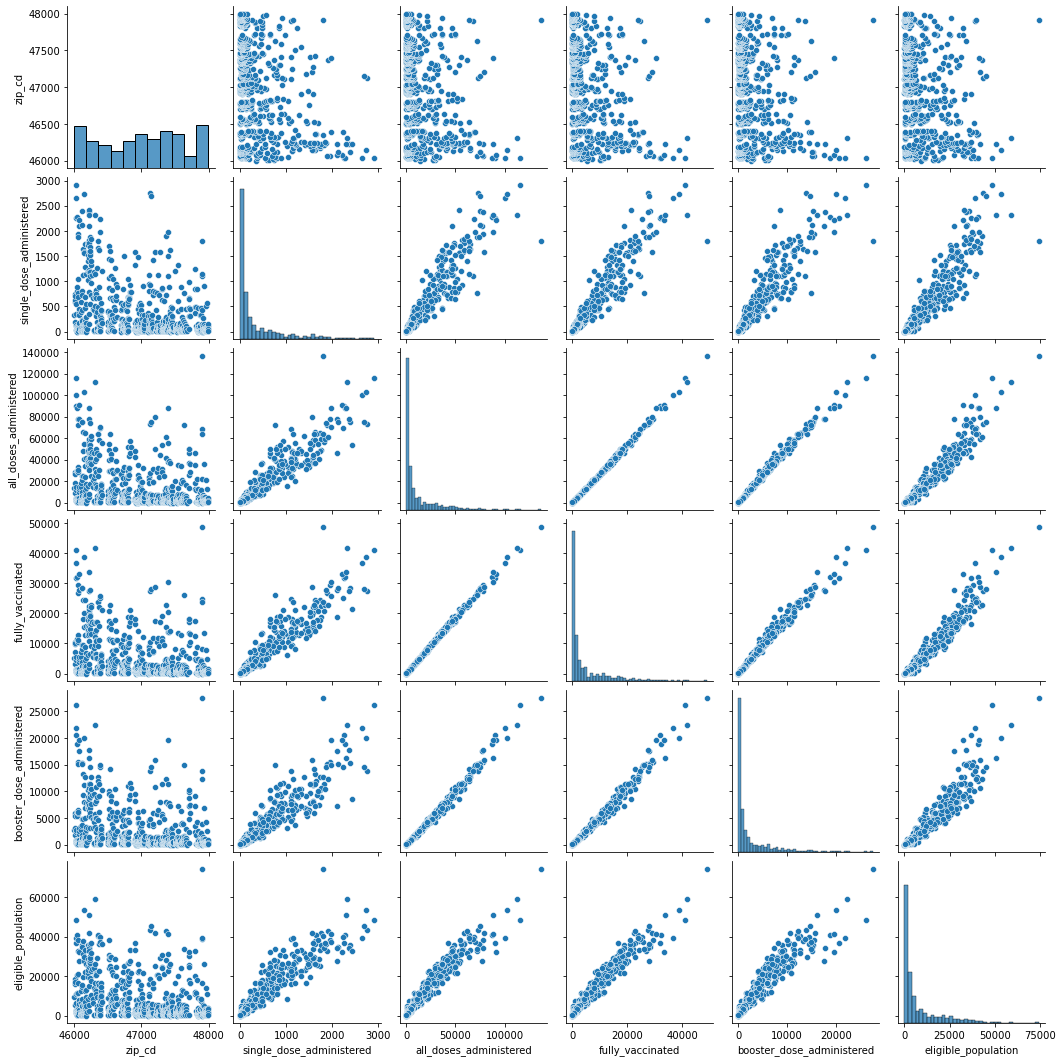

In [23]:
import seaborn as sns
sns.pairplot(data,diag_kind="hist")
plt.show()

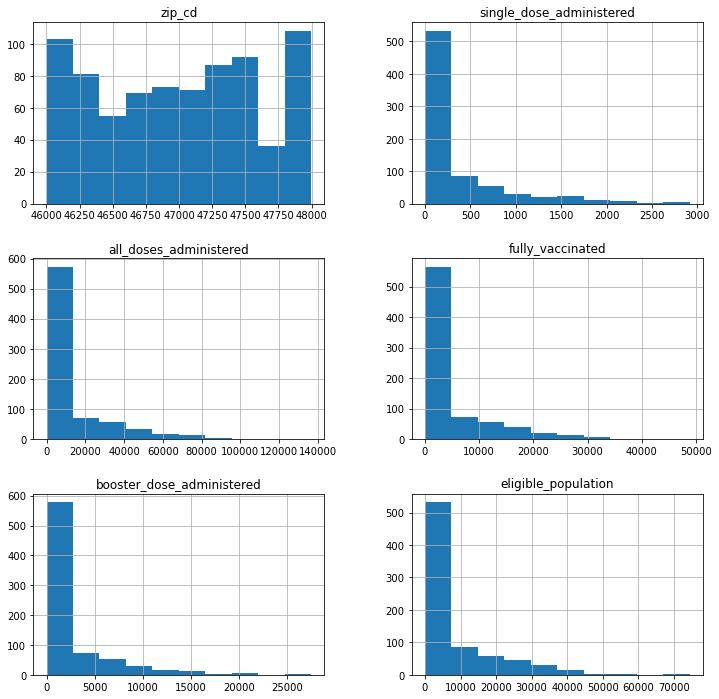

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
data.hist(figsize=(12, 12))
plt.show()

# Plot distribution plots for all features
for col in data.columns:
    data[col].plot
    plt.savefig('histograms_init.png')
    plt.show()
    

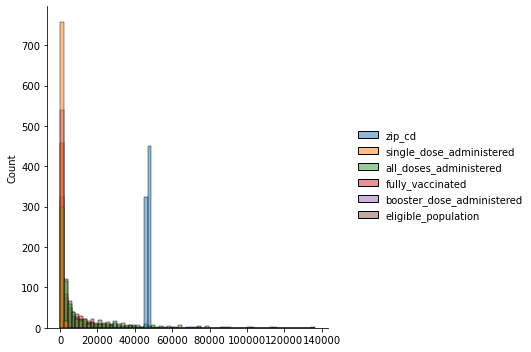

In [25]:
features = data.columns
sns.displot(data[features])
plt.show()
#sns.histplot(data[features[5]])

<b> Try to Visualize Data into 2 dimensions for inference

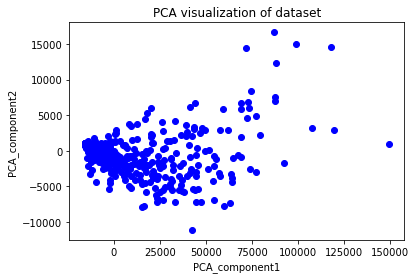

In [26]:
from sklearn.decomposition import PCA

# Apply PCA with two principal components
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)

# Plot the data in two dimensions
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c="blue")
plt.xlabel ('PCA_component1') 
plt.ylabel ('PCA_component2')
plt.title ("PCA visualization of dataset")
plt.show()

In [36]:
pca_data=pd.DataFrame(transformed_data)
pca_data.corr()

,0,1
0,1.000000e+00,-3.091672e-15
1,-3.091672e-15,1.000000e+00


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

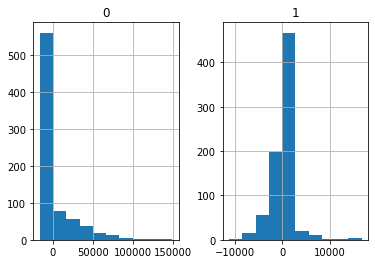

In [37]:
pca_data.hist()

In [27]:
explained_variance = pca.explained_variance_ratio_
total_variance = sum(explained_variance)
total_variance

0.9992270207808693

In [28]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(data)

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 775 samples in 0.003s...
[t-SNE] Computed neighbors for 775 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 775 / 775
[t-SNE] Mean sigma: 434.769786
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.348610
[t-SNE] KL divergence after 1000 iterations: 0.359886


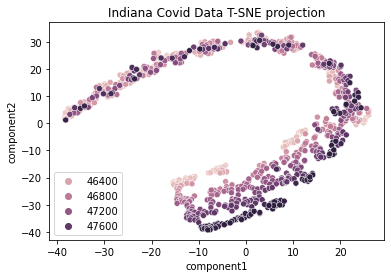

In [29]:
import seaborn as sns
df_tsne= pd.DataFrame()
df_tsne['zip_cd'] = data['zip_cd']
df_tsne["component1"] = z[:,0]
df_tsne["component2"] = z[:,1]
sns.scatterplot(x="component1", y="component2", hue=df_tsne.zip_cd.tolist(),
                data=df_tsne,).set(title="Indiana Covid Data T-SNE projection")
plt.show()

# Selecting hyperparameters for model

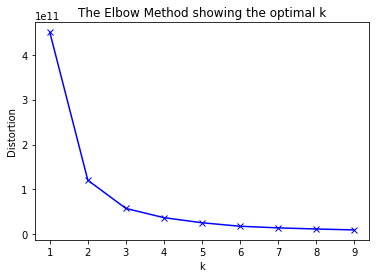

In [30]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## **Why use BIC for choosing k components

The Bayesian Information Criterion (BIC) is often used for selecting the number of cluster components in Gaussian mixture modeling (GMM) clustering. This is because BIC is a model selection criterion that balances the fit of the model to the data with the complexity of the model.

In GMM clustering, the BIC is calculated as follows:

BIC = log(N) * K - 2 * log(L)

where N is the number of data points, K is the number of cluster components, and L is the likelihood of the data given the model.

The BIC criterion favors models with a higher likelihood and a lower number of cluster components. This means that the BIC will be lower for models that fit the data well and have a smaller number of cluster components. This makes the BIC a useful criterion for selecting the number of cluster components in GMM clustering, as it helps to identify the model that best balances the fit to the data with the complexity of the model.

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


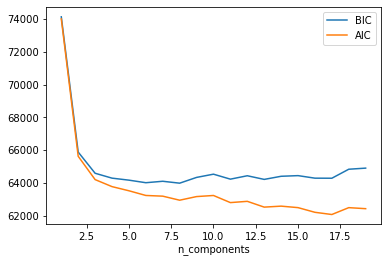

In [39]:
import numpy as np
from sklearn import mixture
n_components = np.arange(1, 20)
models = [ mixture.GaussianMixture(n_components=n, covariance_type='full').fit(data) for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

## Choice of Priors

### For GMM models
In a general Gaussian mixture model (GMM), the default priors for the mixture weights, means, and covariances are typically chosen to be uniform, meaning that all values are equally likely. For the mixture weights, this means that each mixture component is equally likely to be chosen to generate a given data point. For the means, this means that all possible values are equally likely to be the mean of a given mixture component. And for the covariances, this means that all possible values are equally likely to be the covariance of a given mixture component.

These default priors can be useful when there is no prior knowledge about the data or when the data are very heterogeneous and it is not clear what type of cluster structure to expect. However, in some cases, using these default priors can lead to suboptimal performance, particularly if the data have a clear cluster structure or if there is prior knowledge about the data that can be incorporated into the model. In these cases, it may be beneficial to use more informative priors that can help the model better capture the underlying structure of the data.'

### For VB-GMM models
In a variational Bayesian Gaussian mixture model (VB GMM), the priors used are typically conjugate priors for the mixture weights, means, and covariances. Conjugate priors are a special class of priors that make it easy to compute the posterior distribution in a Bayesian model.

In the case of the mixture weights, a common choice of prior is the Dirichlet distribution. For the means, a common choice is the normal-inverse-Wishart distribution. And for the covariances, a common choice is the inverse-Wishart distribution.

In a general Gaussian mixture model (GMM), the priors used for the mixture weights, means, and covariances are not necessarily conjugate priors. In this case, the priors can be chosen based on the specific problem at hand and the desired properties of the model. For example, the priors might be chosen to encourage certain types of cluster structures or to incorporate prior knowledge about the data.

# Clustering data using GMM, VB-GMM models

In [40]:
import numpy as np
from scipy.stats import gamma
from sklearn.mixture import BayesianGaussianMixture

In [41]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=100,init_params='kmeans')
gmm.fit(data)
clusters_gmm=gmm.predict(data)

In [42]:
from sklearn.metrics import silhouette_score
sscore = silhouette_score(data, clusters_gmm,metric='euclidean')
sscore

0.32892527325658627

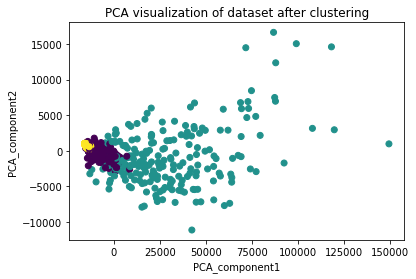

In [54]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=clusters_gmm)
plt.xlabel ('PCA_component1') 
plt.ylabel ('PCA_component2')
plt.title ("PCA visualization of dataset after clustering")
plt.show()

In [44]:
vbgmm = BayesianGaussianMixture(n_components=3,covariance_type='full')

In [45]:
vbgmm.fit(data)
clusters = vbgmm.predict(data)

In [46]:
from sklearn.metrics import silhouette_score
sscore = silhouette_score(data, clusters,metric='euclidean')
sscore

0.5130524362931842

In [ ]:
# Plot the data points before clustering
#sns.pairplot(data, hue='third_feature')
zb_data = data
zb_data['clusters'] = clusters
# Plot the data points after clustering
sns.pairplot(zb_data, hue='clusters')
plt.show()

In [47]:
vbgmm.covariances_

array([[[ 3.39063777e+05, -5.66522221e+03, -1.70973676e+05,
         -6.62073610e+04, -3.33957866e+04, -1.31315528e+05],
        [-5.66522221e+03,  3.27777525e+03,  1.01741471e+05,
          3.86859295e+04,  1.99627751e+04,  7.31781401e+04],
        [-1.70973676e+05,  1.01741471e+05,  3.68128868e+06,
          1.38665055e+06,  7.27466611e+05,  2.56079769e+06],
        [-6.62073610e+04,  3.86859295e+04,  1.38665055e+06,
          5.22941429e+05,  2.73551683e+05,  9.69956997e+05],
        [-3.33957866e+04,  1.99627751e+04,  7.27466611e+05,
          2.73551683e+05,  1.44357185e+05,  5.01097841e+05],
        [-1.31315528e+05,  7.31781401e+04,  2.56079769e+06,
          9.69956997e+05,  5.01097841e+05,  1.94000258e+06]],

       [[ 3.04611058e+05, -1.04241763e+05, -1.46211714e+06,
         -5.84249920e+05, -3.19538963e+05, -1.50827396e+05],
        [-1.04241763e+05,  3.51707588e+05,  1.04587348e+07,
          3.88769008e+06,  2.16336077e+06,  4.88462215e+06],
        [-1.46211714e+06,  1.0

In [48]:
vbgmm.means_

array([[47153.14866266,    55.86524341,  1865.0897002 ,   710.33515367,
          362.22707704,  1516.81635071],
       [46664.67823026,  1193.37375492, 44226.28685004, 16462.44331278,
         8800.32540864, 25864.71206855],
       [46933.37383839,   319.98007963, 10939.30794732,  4147.75585949,
         2115.11035937,  8190.44666797]])

In [49]:
vbgmm.precisions_

array([[[ 3.12153915e-06, -9.84476387e-06, -1.32572889e-05,
          2.74584650e-05,  1.68920567e-05, -9.55696888e-09],
        [-9.84476387e-06,  5.31052572e-03,  2.35081502e-03,
         -5.23332424e-03, -2.70602728e-03,  1.14510437e-05],
        [-1.32572889e-05,  2.35081502e-03,  2.21168104e-03,
         -4.43589701e-03, -3.10968327e-03,  1.20866084e-05],
        [ 2.74584650e-05, -5.23332424e-03, -4.43589701e-03,
          9.39386682e-03,  5.50754147e-03, -6.46692456e-05],
        [ 1.68920567e-05, -2.70602728e-03, -3.10968327e-03,
          5.50754147e-03,  5.52157231e-03,  2.81358444e-05],
        [-9.55696888e-09,  1.14510437e-05,  1.20866084e-05,
         -6.46692456e-05,  2.81358444e-05,  9.19431583e-06]],

       [[ 4.43409297e-06,  1.98484398e-06, -6.15121096e-07,
          1.59780926e-06,  4.35508227e-07, -1.95803731e-07],
        [ 1.98484398e-06,  1.78617506e-05,  6.86503809e-06,
         -1.42122544e-05, -9.19397262e-06, -3.54603109e-07],
        [-6.15121096e-07,  6.8

<b> Applying VBGMM to PCA data

## Why PCA for data
Applying principal component analysis (PCA) to the data before fitting a Gaussian mixture model (GMM) can improve the clustering performance by reducing the dimensionality of the data. This can help to remove noise and reduce the complexity of the data, making it easier for the GMM to identify the underlying clusters. Additionally, PCA can help to improve the convergence of the GMM, which can further improve the clustering performance. It's important to note that whether or not applying PCA to the data before fitting a GMM will improve the clustering performance will depend on the specific dataset and the desired outcome. In some cases, it may not be necessary or may even degrade the performance. It's always a good idea to try multiple approaches and compare the results to determine the best approach for a given dataset.

In [50]:
vbgmm_pca = BayesianGaussianMixture(n_components=3,covariance_type='full').fit(transformed_data)
clusters_pca = vbgmm_pca.predict(transformed_data)

In [51]:
from sklearn.metrics import silhouette_score
sscore = silhouette_score(data, clusters_pca,metric='euclidean')
sscore

0.5417898756034264

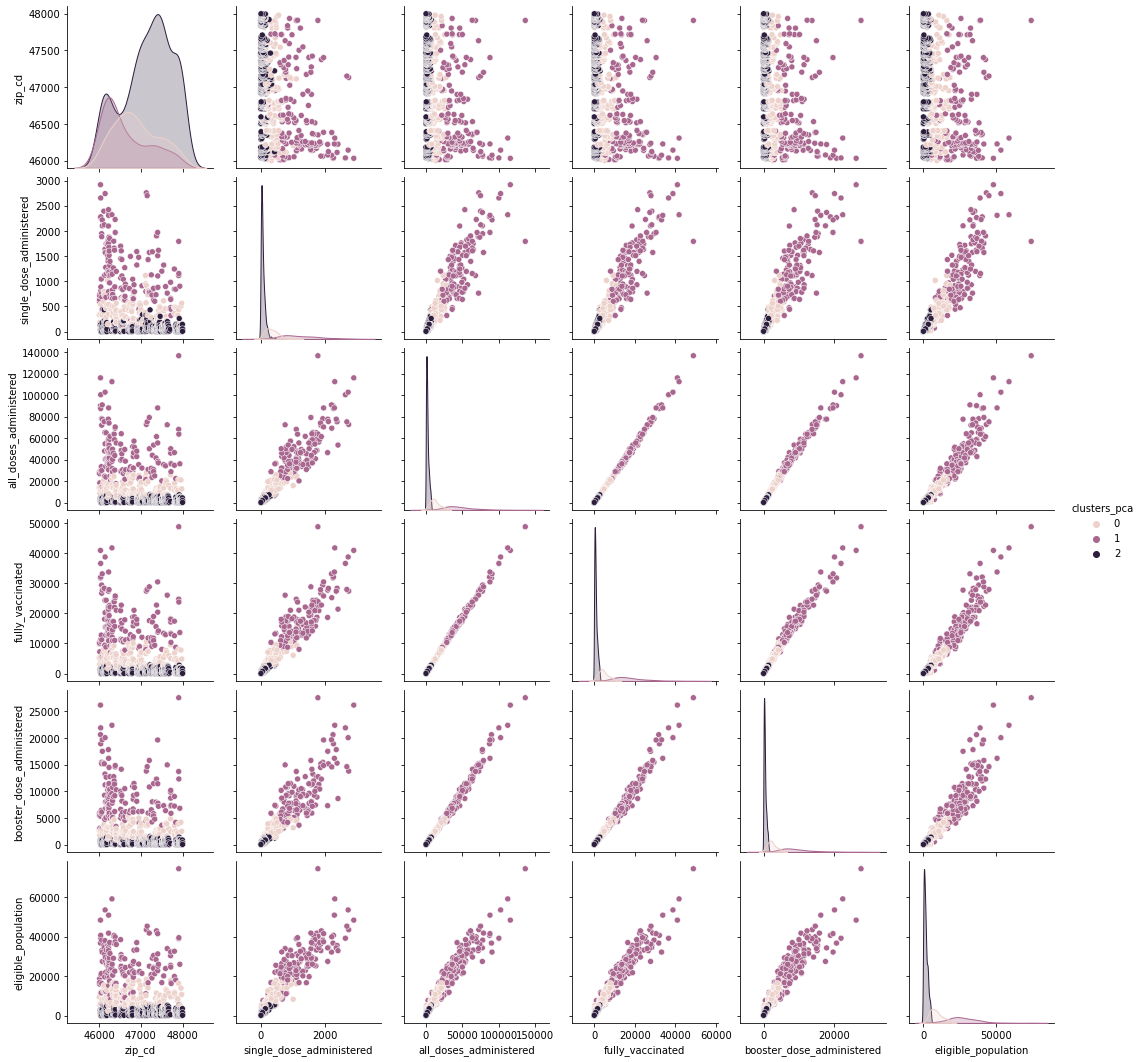

In [52]:
# Plot the data points before clustering
#sns.pairplot(data, hue='third_feature')
nb_data = data
nb_data['clusters_pca'] = clusters_pca
# Plot the data points after clustering
sns.pairplot(nb_data, hue='clusters_pca')
plt.show()

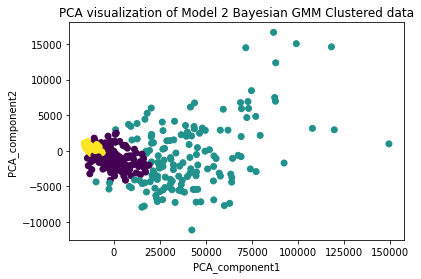

In [55]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=clusters_pca)
plt.xlabel ('PCA_component1') 
plt.ylabel ('PCA_component2')
plt.title ("PCA visualization of Model 2 Bayesian GMM Clustered data")
plt.show()

# Label the clusters and save the Data for Visualization

In [57]:
data


,zip_cd,single_dose_administered,all_doses_administered,fully_vaccinated,booster_dose_administered,eligible_population,clusters_pca
0,46001,334,13875,5237,2687,9433,0
1,46011,588,27172,9907,5661,16392,1
2,46012,634,28860,10495,5988,18671,1
3,46013,737,26996,10145,5417,15946,1
4,46016,707,18318,7251,3051,16904,1
...,...,...,...,...,...,...,...
770,47992,42,2130,770,439,1327,2
771,47993,144,4396,1678,859,3502,2
772,47994,20,538,213,96,296,2
773,47995,54,1890,733,352,1516,2


In [83]:
df_grouped = data.groupby("clusters_pca").agg({'single_dose_administered': 'mean', 'all_doses_administered':'mean','booster_dose_administered':'mean','fully_vaccinated': 'mean','eligible_population': 'mean'})

# rename the columns to match the SQL statement
df_grouped.columns = ['avg(single_dose_administered)','avg(all_doses_administered)','avg(booster_dose_administered)', 'avg(fully_vaccinated)','avg(eligible_population)']


In [84]:
df_grouped

,avg(single_dose_administered),avg(all_doses_administered),avg(booster_dose_administered),avg(fully_vaccinated),avg(eligible_population)
clusters_pca,,,,,
0,341.670807,11991.614907,2305.850932,4536.571429,8808.689441
1,1239.171053,46013.651316,9172.947368,17128.750000,26962.756579
2,62.337662,1980.787879,385.445887,754.768398,1580.625541


In [62]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   avg(single_dose_administered)  3 non-null      float64
 1   avg(all_doses_administered)    3 non-null      float64
 2   avg(fully_vaccinated)          3 non-null      float64
 3   avg(eligible_population)       3 non-null      float64
dtypes: float64(4)
memory usage: 228.0 bytes


In [85]:
result = df_grouped.divide(df_grouped['avg(eligible_population)'], axis=0)
result

,avg(single_dose_administered),avg(all_doses_administered),avg(booster_dose_administered),avg(fully_vaccinated),avg(eligible_population)
clusters_pca,,,,,
0,0.038788,1.361339,0.261770,0.515011,1.0
1,0.045959,1.706563,0.340208,0.635274,1.0
2,0.039439,1.253167,0.243857,0.477512,1.0


In [86]:
result['ClusterLabel']=["Medium","High","Low"]

In [87]:
result.index.name='index'
result

,avg(single_dose_administered),avg(all_doses_administered),avg(booster_dose_administered),avg(fully_vaccinated),avg(eligible_population),ClusterLabel
index,,,,,,
0,0.038788,1.361339,0.261770,0.515011,1.0,Medium
1,0.045959,1.706563,0.340208,0.635274,1.0,High
2,0.039439,1.253167,0.243857,0.477512,1.0,Low


In [73]:
df_grouped['agg_value_all_feature'] = df_grouped[df_grouped.columns[0]]+df_grouped[df_grouped.columns[1]]+df_grouped[df_grouped.columns[2]]

In [74]:
df_grouped

,avg(single_dose_administered),avg(all_doses_administered),avg(fully_vaccinated),avg(eligible_population),agg_value_all_feature
clusters_pca,,,,,
0,341.670807,11991.614907,4536.571429,8808.689441,16869.857143
1,1239.171053,46013.651316,17128.750000,26962.756579,64381.572368
2,62.337662,1980.787879,754.768398,1580.625541,2797.893939


In [71]:
# create a function to assign the labels
def assign_label(x):
    if x == 1:
        return 'High'
    elif x == 2:
        return 'Medium'
    else:
        return 'Low'

# apply the function to the 'clusters_pca' column and assign the result to a new column
data['clusters_label'] = data['clusters_pca'].apply(assign_label)

In [72]:
data

,zip_cd,single_dose_administered,all_doses_administered,fully_vaccinated,booster_dose_administered,eligible_population,clusters_pca,clusters_label
0,46001,334,13875,5237,2687,9433,0,Low
1,46011,588,27172,9907,5661,16392,1,High
2,46012,634,28860,10495,5988,18671,1,High
3,46013,737,26996,10145,5417,15946,1,High
4,46016,707,18318,7251,3051,16904,1,High
...,...,...,...,...,...,...,...,...
770,47992,42,2130,770,439,1327,2,Medium
771,47993,144,4396,1678,859,3502,2,Medium
772,47994,20,538,213,96,296,2,Medium
773,47995,54,1890,733,352,1516,2,Medium


In [ ]:
data.to_csv("Indiana_Covid_Clustered.csv")

# Why EM for this dataset
By eye, we recognize that these transformed clusters are non-circular, and thus circular clusters would be a poor fit. Nevertheless, k-means is not flexible enough to account for this, and tries to force-fit the data into four circular clusters. This results in a mixing of cluster assignments where the resulting circles overlap: see especially the bottom-right of this plot. One might imagine addressing this particular situation by preprocessing the data with PCA (see In Depth: Principal Component Analysis), but in practice there is no guarantee that such a global operation will circularize the individual data.

These two disadvantages of k-means—its lack of flexibility in cluster shape and lack of probabilistic cluster assignment—mean that for many datasets (especially low-dimensional datasets) it may not perform as well as you might hope.

You might imagine addressing these weaknesses by generalizing the k-means model: for example, you could measure uncertainty in cluster assignment by comparing the distances of each point to all cluster centers, rather than focusing on just the closest. You might also imagine allowing the cluster boundaries to be ellipses rather than circles, so as to account for non-circular clusters. It turns out these are two essential components of a different type of clustering model, Gaussian mixture models.

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np

n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]

plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this choice of number of components measures how well GMM works as a density estimator, not how well it works as a clustering algorithm. I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full',max_iter=500,init_params='kmeans')
gmm.fit(data)
yclust=gmm.predict(data)

In [ ]:
from sklearn.metrics import silhouette_score
sscore = silhouette_score(data, yclust,metric='euclidean')
sscore

## How can Clustering help?
Clustering various zip codes on the basis of corona vaccination features, such as the number of single doses administered, the number of people who are fully vaccinated, the number of booster doses administered, and the eligible population, can help to identify areas where vaccination efforts may be falling short. By grouping together zip codes with similar vaccination rates, it is possible to identify clusters of zip codes that have lower vaccination rates compared to other areas.

For example, if you cluster the zip codes and find that there are several zip codes with low vaccination rates, you could focus your efforts on these areas to try and increase the vaccination rates. This could involve providing additional resources, such as additional vaccination clinics or education programs, to these areas to help increase vaccination rates.

Additionally, clustering the zip codes can also help to identify areas where the vaccination rollout is going well, and where efforts can be scaled back or redirected to other areas. By identifying areas where the vaccination rollout is successful, it is possible to allocate resources more efficiently and target areas where they are needed most.

Overall, clustering the zip codes on the basis of vaccination rates can help to identify areas where vaccination efforts need to be improved, and can help to target resources more effectively.
